Zadanie 1
---
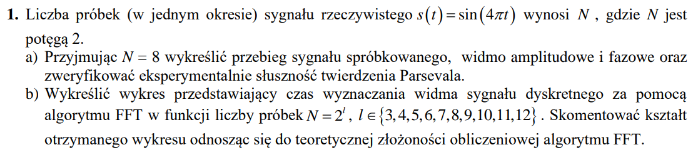

Bazując na wyglądzie funkcji **s(t) = sin(4&#960;t)**, można łatwo zauważyć / wyliczyć, że okres będzie wynosił 0.5 sekundy, dlatego wykres zostanie przedstawiony w zakresie 0 - 0.5 sekundy. <br> <br>
- W pierwszej części zajmiemy się wyznaczeniem wykresu zwykłęgo i nałożymy na niego wartości spróbkowane dla **N=8**


In [1]:
# importowanie ważnych i przydatnych bibliotek
import numpy as np
import time
import matplotlib.pyplot as plt


# Parametry sygnału
fs = 1000  # Częstotliwość próbkowania
T = 1 / fs  # Okres próbkowania
duration = 0.5  # Czas trwania okresu

# Czas sygnału
times = np.arange(0, duration, T)

# Sygnał rzeczywisty
def signal_t(time: float):
    return np.sin(4 * np.pi * time)

# Przygotowanie listy wartości do stworzenia wykresu
array_of_values = [signal_t(t) for t in times]

# wartości czasu dla spróbkowanego sygnału
sampled_times_values = np.arange(0, duration, duration / 8)

# wartości funkcji dla spróbkowanego czasu
sampled_values = [signal_t(t) for t in sampled_times_values]

In [2]:
# Wykres sygnału spróbkowanego na tle zwykłego sygnału
def plot_sampled_signal(times: list, values: list, sampled_times: list, sampled_values: list):
    plt.figure(figsize=(10, 4))

    # Wykres sygnału rzeczywistego
    plt.plot(times, values, label='Sygnał rzeczywisty i spróbkowany')

    # Wykres sygnału spróbkowanego
    plt.stem(sampled_times, sampled_values, linefmt='red', markerfmt='red', basefmt='black', label='Sygnał spróbkowany')

    # Dodanie czarnej kreski na osi x
    plt.axhline(0, color='black', linestyle='--', linewidth=0.8)

    plt.title('Sygnał spróbkowany')
    plt.xlabel('Czas [s]')
    plt.ylabel('Wartość')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()

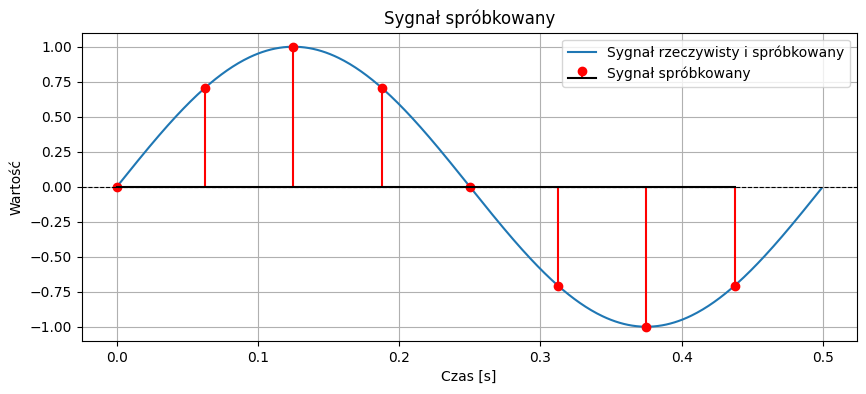

In [3]:
# Generowanie wykresu
plot_sampled_signal(times, array_of_values, sampled_times_values, sampled_values)

- Teraz zajmiemy się wyznaczeniem widma fazowego oraz amplitudowego naszej funkcji.

In [4]:
def calculate_sample_frequency(values: list[float], T: float) -> float:
    sample_frequency = 1 / T
    return sample_frequency

def calculate_plot_amplitude_spectrum(values: list[float], sample_frequency: float) -> tuple[np.ndarray[float], np.ndarray[float]]:
    fft_values = np.fft.fft(values)
    amplitude_spectrum = np.abs(fft_values)
    frequency = np.fft.fftfreq(len(values), d=1/sample_frequency)
    return frequency[:len(values)//2], amplitude_spectrum[:len(values)//2]

def calculate_plot_phase_spectrum(values: list[float], sample_frequency: float) -> tuple[np.ndarray[float], np.ndarray[float]]:
    fft_values = np.fft.fft(values)
    phase_spectrum = np.angle(fft_values)
    frequency = np.fft.fftfreq(len(values), d=1/sample_frequency)
    return frequency[:len(values)//2], phase_spectrum[:len(values)//2]

def show_grids(values: list[float], T: float) -> None:
    sample_frequency = calculate_sample_frequency(values, T)
    frequency_amp, amplitude_spectrum = calculate_plot_amplitude_spectrum(values, sample_frequency)
    frequency_phase, phase_spectrum = calculate_plot_phase_spectrum(values, sample_frequency)

    figure, axis = plt.subplots(2, 1, figsize=(10, 6))

    # wykres widma amplitudowego
    axis[0].stem(frequency_amp, amplitude_spectrum, label='Widmo amplitudowe', linefmt='red', markerfmt='red', basefmt='black')
    axis[0].set_title('Widmo amplitudowe')
    axis[0].set_xlabel('Częstotliwość [Hz]')
    axis[0].set_ylabel('Wartość')
    axis[0].grid(True)
    axis[0].legend(loc='upper right')

    # odstęp między wykresami
    plt.subplots_adjust(hspace=0.5)

    # wykres widma fazowego
    axis[1].stem(frequency_phase, phase_spectrum, label='Widmo fazowe', linefmt='red', markerfmt='red', basefmt='black')
    axis[1].set_title('Widmo fazowe')
    axis[1].set_xlabel('Częstotliwość [Hz]')
    axis[1].set_ylabel('Wartość')
    axis[1].grid(True)
    axis[1].legend(loc='upper right')

    plt.show()

In [5]:
def calculate_sample_frequency(values: list[float], duration: float) -> float:
    fft_values = np.fft.fft(values)

    sample_frequency = np.fft.fftfreq(len(fft_values), duration / len(fft_values))

    return sample_frequency

# Wykres widma amplitudowego
def calculate_plot_amplitude_spectrum(values: list[float]) -> np.ndarray[float]:

    fft_values = np.fft.fft(values)

    amplitude_spectrum = np.abs(fft_values)

    return amplitude_spectrum

# Wykres widma fazowego

def calculate_plot_phase_spectrum(values: list[float]) -> np.ndarray[float]:

    fft_values = np.fft.fft(values)

    phase_spectrum = np.angle(fft_values)

    return phase_spectrum


def show_grids(values: list[float], spectrum_freqs: list[float]) -> None:
    amplitude_spectrum = calculate_plot_amplitude_spectrum(values)
    phase_spectrum = calculate_plot_phase_spectrum(values)

    figure, axis = plt.subplots(2, 1, figsize=(10, 6))

    # wykres widma amplitudowego
    axis[0].stem(spectrum_freqs, amplitude_spectrum, label='Widmo amplitudowe', linefmt='red', markerfmt='red', basefmt='black')
    axis[0].set_title('Widmo amplitudowe')
    axis[0].set_xlabel('Częstotliwość [Hz]')
    axis[0].set_ylabel('Wartość')
    axis[0].grid(True)
    axis[0].legend(loc='upper right')

    # odstęp między wykresami
    plt.subplots_adjust(hspace=0.5)

    # wykres widma fazowego
    axis[1].stem(spectrum_freqs, phase_spectrum, label='Widmo fazowe', linefmt='red', markerfmt='red', basefmt='black')
    axis[1].set_title('Widmo fazowe')
    axis[1].set_xlabel('Częstotliwość [Hz]')
    axis[1].set_ylabel('Wartość')
    axis[1].grid(True)
    axis[1].legend(loc='upper right')

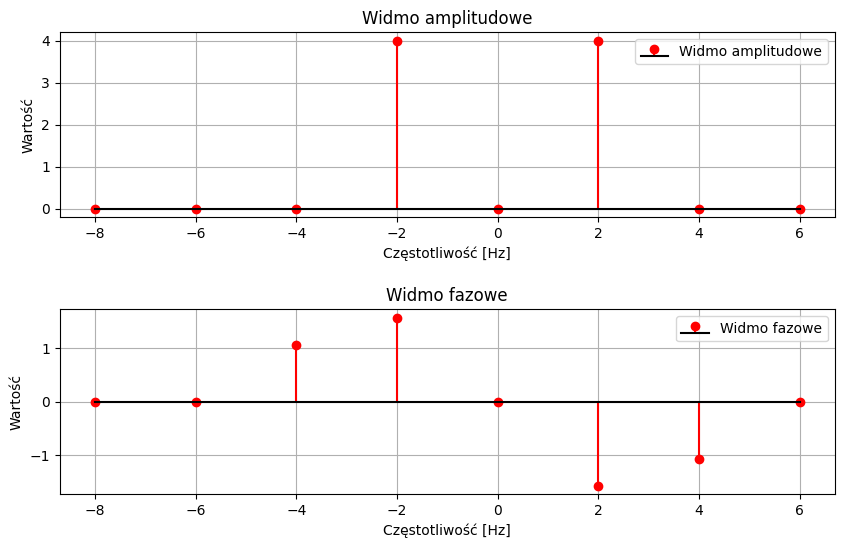

In [6]:
spectrum_freqs = calculate_sample_frequency(sampled_values, duration)

# Przykładowe dane
show_grids(sampled_values, spectrum_freqs)

- W następym kroku sprawdzimy poprawność twierdzenia Parsevala

In [7]:
# Twierdzenie Parsevala
def calculate_parseval_theorem(values: list[float]) -> float:

    fft_values = np.fft.fft(values)

    signal_energy = np.sum(np.abs(values) ** 2)
    fft_signal_energy = np.sum(np.abs(fft_values) ** 2) / len(fft_values)

    return signal_energy, fft_signal_energy

parseval_theorem_values = calculate_parseval_theorem(sampled_values)

print(f'Średnia moc sygnału: {parseval_theorem_values[0]}')
print(f'Suma składowych widma mocy: {parseval_theorem_values[1]}')
print(f'Moc średnia sygnału okresowego jest równa sumie składowych widma mocy: {parseval_theorem_values[0] == parseval_theorem_values[1]}')


Średnia moc sygnału: 4.0
Suma składowych widma mocy: 4.0
Moc średnia sygnału okresowego jest równa sumie składowych widma mocy: True


Patrząc na wyniki, możemy powiedzieć że : **wartości średniej mocy sygnału oraz suma składowych widma mocy są równe, co oznacza, że twierdzenie Parsevala jest spełnione**

- W ostatniej części zadania 1 wyznaczymy wykres przedstawiający czas wyznaczania widma sygnału dyskretnego za pomocą algorytmu FFT. Eksperyment będziemy przeprowadzać dla liczby próbek **N = 2^l**  <br> 
Nasze l to zbiór {3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

In [8]:
# Stałą określanąca ilość testów dla danego N
NUMBER_OF_TESTS = 2500

# Dane do sprawdzenia
exponents = np.arange(3, 12, 1)

# Funkcja testująca FFT
def time_fft(signal_values: list[float]) -> float:
    start = time.time()
    np.fft.fft(signal_values)
    end = time.time()
    return end - start

amount_of_samples = [2 ** exponent for exponent in exponents]
avg_times_measuered = []

for sample in amount_of_samples:
    times = np.arange(0, duration, duration / sample)
    values = [signal_t(t) for t in times]
    avg_time = 0
    for _ in range(NUMBER_OF_TESTS):
        avg_time += time_fft(values)
    avg_times_measuered.append(avg_time / NUMBER_OF_TESTS)

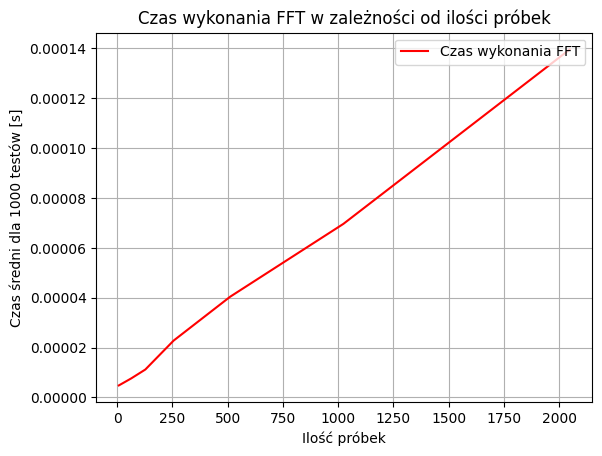

In [9]:
plt.plot(amount_of_samples, avg_times_measuered, label='Czas wykonania FFT', color='red')
plt.title('Czas wykonania FFT w zależności od ilości próbek')
plt.xlabel('Ilość próbek')
plt.ylabel('Czas średni dla 1000 testów [s]')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

Otrzymany wykres wydaje się być zbliżony do wykresu liniowego. Dzieje się tak, ponieważ kształt wykresu nlog(n) jest zbliżony właśnie do liniowego, a teoretyczna złożoność obliczeniowa algorytmu FFT jest właśnie nlog(n). Bazując na kształcie wykresu możemy powiedzieć, że eksperyment nie zaprzecza temu, że właśnie FFT posiada taką złożoność obliczeniową jaką jest nlog(n)

Zadanie 2
---
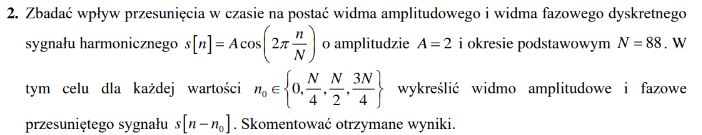

In [10]:
dft = lambda x: np.fft.fft(x)

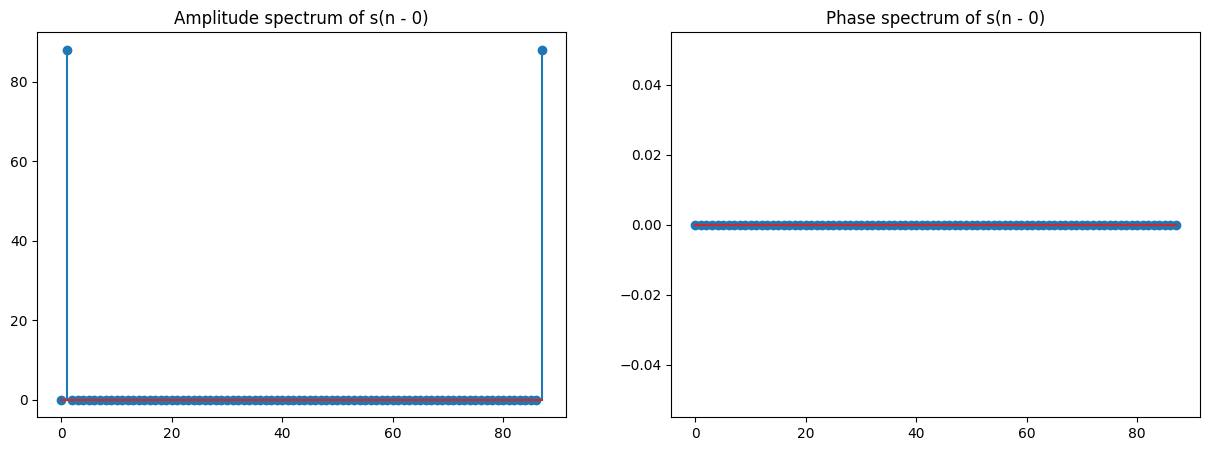

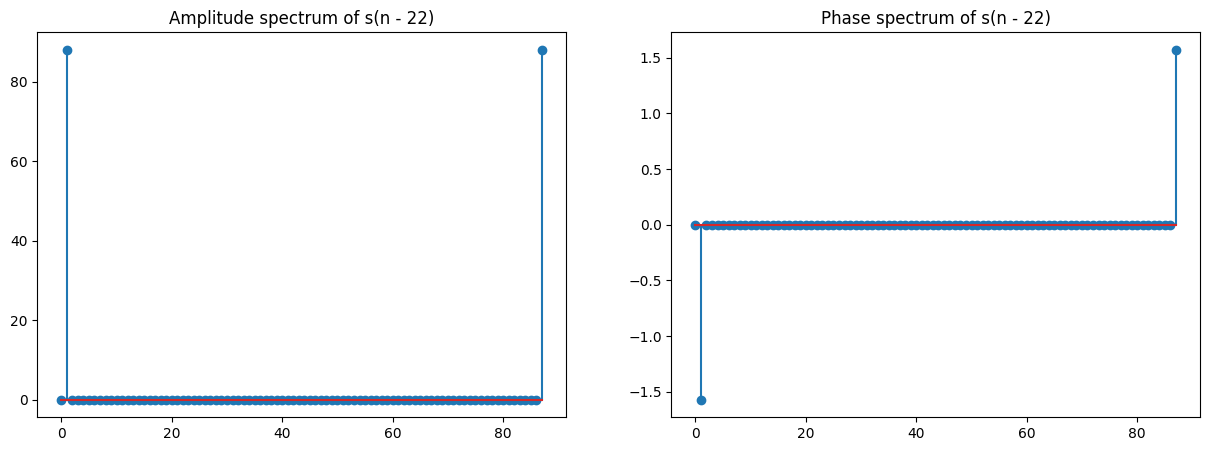

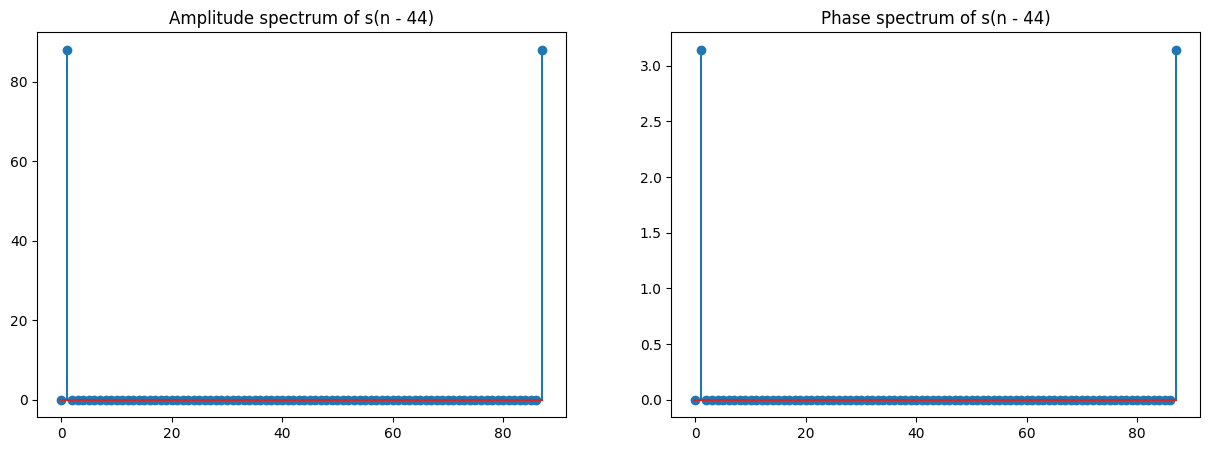

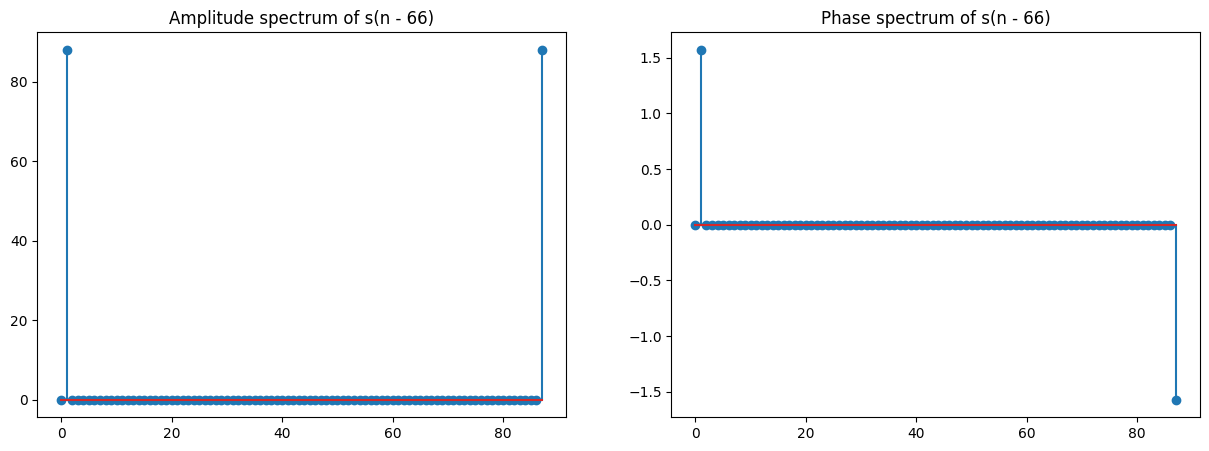

In [11]:
ACC = 1e-9

A = 2
N = 88

s = lambda n: A * np.cos(2 * np.pi * n / N)

x = np.arange(N)

for n0 in [0, N // 4, N // 2, 3 * N // 4]:
    signal = s(x - n0)
    d  = dft(signal)
    d[np.abs(d) < ACC] = 0

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    amp_spec = np.abs(d)
    amp_spec[np.abs(amp_spec) < ACC] = 0
    ax1.stem(amp_spec) # amplitude
    ax1.title.set_text(f"Amplitude spectrum of s(n - {n0})")

    phs_spec = np.angle(d)
    phs_spec[np.abs(phs_spec) < ACC] = 0
    ax2.stem(phs_spec)   # phase
    ax2.title.set_text(f"Phase spectrum of s(n - {n0})")

plt.show()

### Wnioski
Zgodnie z własnościami przekształceń Fouriera, przesuwając sygnał w dziedzinie t o n0 
otrzymamy X(w)e^[(-j * w * 2pi  * n0) / N] co oznacza, ze w świecie liczb zespolonych wykonamy obrót względem pkt. (0, 0) - a co za tym idzie, nie wpłyniemy na wartości bezwzględne widma (czyli widmo amplitudowe zgodnie z oczekiwaniami pozostaje bez zmian),
za to wpłyniemy na widmo fazowe,  zwiększając kąt o kolejne wartości n0 - czyli dla naszych wartości odpowiednio o 0pi, 0.5pi, 1pi oraz 1.5pi.

Zadanie 3
---
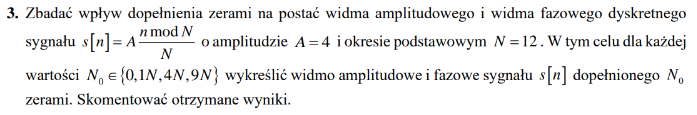

In [12]:
A = 4
N = 12

# Nasz sygnał
def singal_s(n: int) -> float:
    return A * ((n % N) / N)

#Zbiór liczb zer
N0 = [i**2 * N for i in range(0, 4)]

# Lista wartości
signal_s_values = [singal_s(n) for n in range(2*N)]

def plot_signal(signal_values: list[float], color='red') -> None:
    plt.figure(figsize=(10, 4))
    plt.plot(signal_values, label='Sygnał', color=color)
    plt.title('Sygnał')
    plt.xlabel('[n]')
    plt.ylabel('Wartość')
    plt.grid(True)
    plt.legend(loc='upper right')
    plt.show()


def plot_amplitude_spectrum(signal_amplitude_arr: list, num_zeros: int, ax, color='red') -> None:
    padded_amplitude_arr = signal_amplitude_arr + list(np.zeros(num_zeros))
    spectrum_freqs = np.fft.fftfreq(len(padded_amplitude_arr))
    spectrum = np.fft.fft(padded_amplitude_arr)
    sample_num = len(signal_amplitude_arr)
    ax.set_title("Widmo amplitudowe")
    ax.set_xlabel("Częstotliwość (Hz)")
    ax.set_ylabel("Amplituda")
    ax.stem(spectrum_freqs, np.abs(spectrum) / sample_num, color)
    ax.grid(True)

def plot_phase_spectrum(signal_amplitude_arr: list, num_zeros: int, ax, color='red') -> None:
    padded_amplitude_arr = signal_amplitude_arr + list(np.zeros(num_zeros))
    spectrum_freqs = np.fft.fftfreq(len(padded_amplitude_arr))
    spectrum = np.fft.fft(padded_amplitude_arr)
    ax.set_title("Widmo fazowe")
    ax.set_xlabel("Częstotliwość (Hz)")
    ax.set_ylabel("Faza (radinay/pi)")
    ax.stem(spectrum_freqs, np.angle(spectrum) / np.pi, color)
    ax.grid(True)



### Wykres sygnału

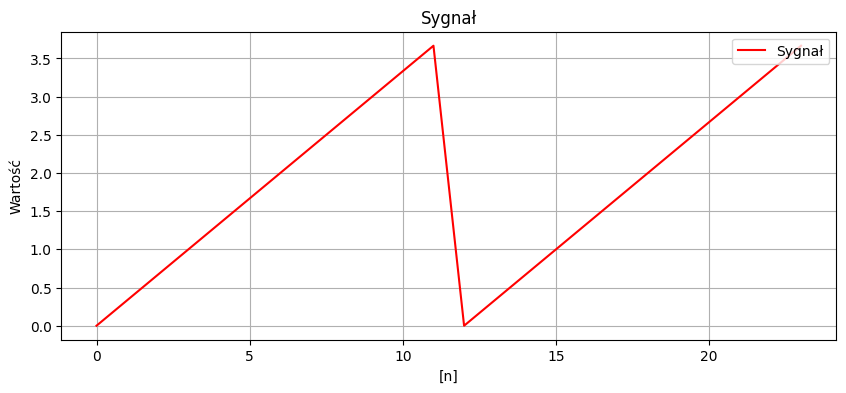

In [13]:
plot_signal(signal_s_values)

### Widmo amplitudowe

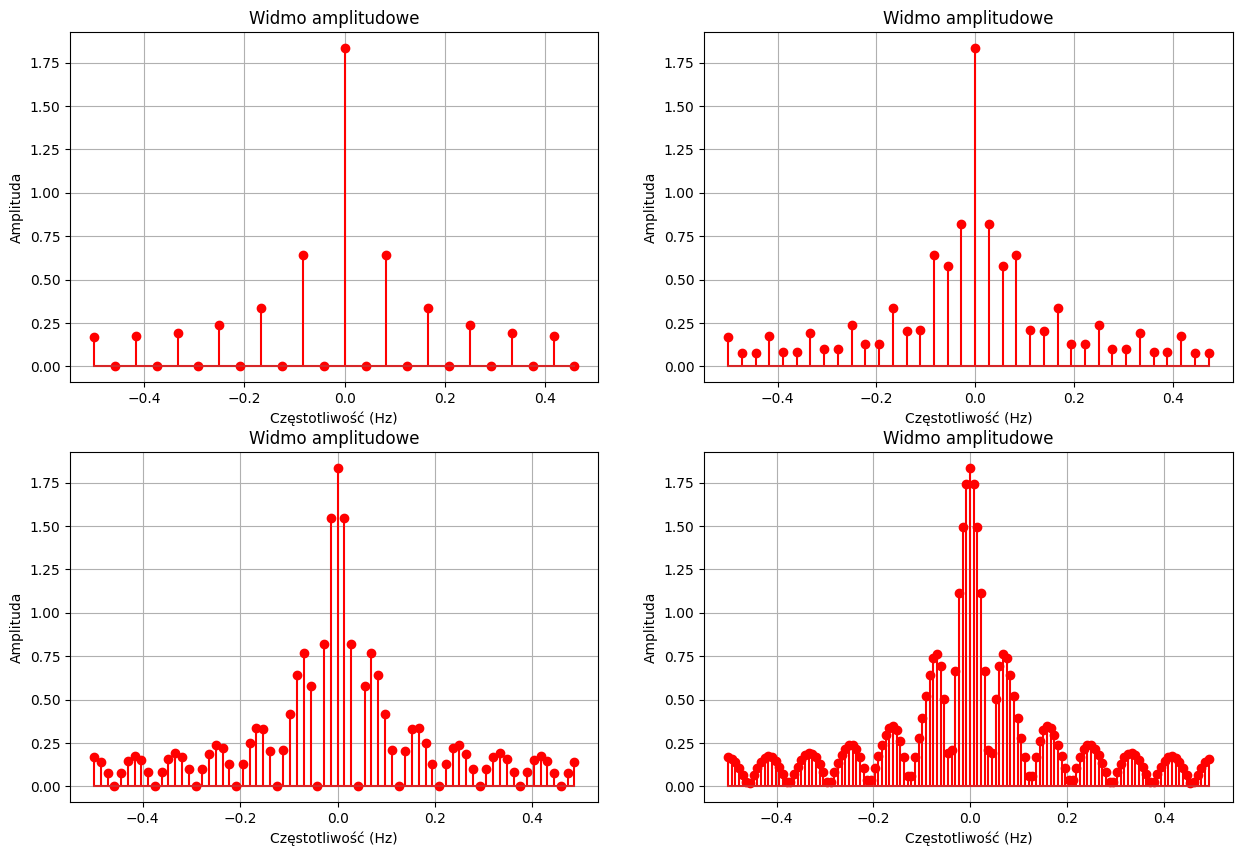

In [14]:
# wykres amplitudowy
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
plot_amplitude_spectrum(signal_s_values, N0[0], ax[0, 0])
plot_amplitude_spectrum(signal_s_values, N0[1], ax[0, 1])
plot_amplitude_spectrum(signal_s_values, N0[2], ax[1, 0])
plot_amplitude_spectrum(signal_s_values, N0[3], ax[1, 1])
plt.show()


### Widmo fazowe

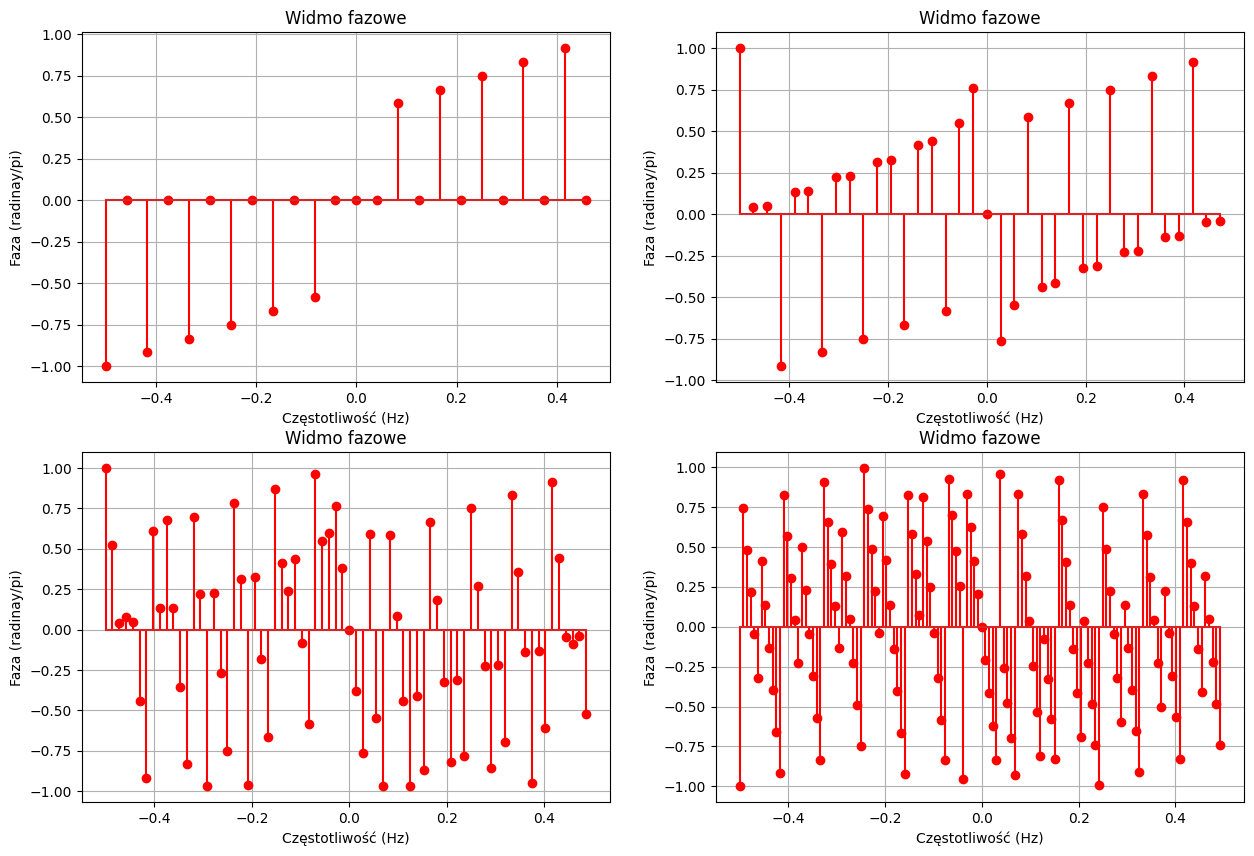

In [15]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
plot_phase_spectrum(signal_s_values, N0[0], ax[0, 0])
plot_phase_spectrum(signal_s_values, N0[1], ax[0, 1])
plot_phase_spectrum(signal_s_values, N0[2], ax[1, 0])
plot_phase_spectrum(signal_s_values, N0[3], ax[1, 1])
plt.show()

### Wnioski

Zero padding (dopełnienie zerami) jest techniką powszechnie stosowaną w przetwarzaniu sygnałów, szczególnie przy wykorzystaniu transformaty Fouriera. Polega ona na dodawaniu zer na końcu sygnału do określonej długości, co umożliwia osiągnięcie pożądanej długości sygnału przed przeprowadzeniem analizy za pomocą transformaty Fouriera. Poprzez tę operację zwiększamy liczbę punktów danych, co prowadzi do uzyskania lepszej rozdzielczości w dziedzinie częstotliwościowej. Dzięki temu wykres widma staje się bardziej szczegółowy i gęstszy. Proces ten działa poprzez interpolację próbek między istniejącymi danymi, które są prawdziwymi wynikami, a dodanymi zerami. W rezultacie uzyskujemy dokładniejszą analizę częstotliwościową sygnału oraz bardziej precyzyjne zrozumienie jego charakterystyki. <br>
Największą różnicę widać w charakterystyce widma fazowego, ponieważ przy orgyginalnym sygnale spróbkowanym nie były widoczne dokładnie skoki fazy, więc analizując taki wykres można by dojść do błędnych wniosków. Z kolei po dodaniu zer stał się on bardziej gęsty i te skoki są już lepiej widoczne

Zadanie 4
---
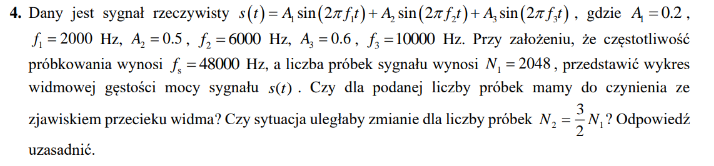

In [16]:
fft = lambda x: np.fft.rfft(x) * 2  # refering to docs, we need to multiply by 2 to get the correct value

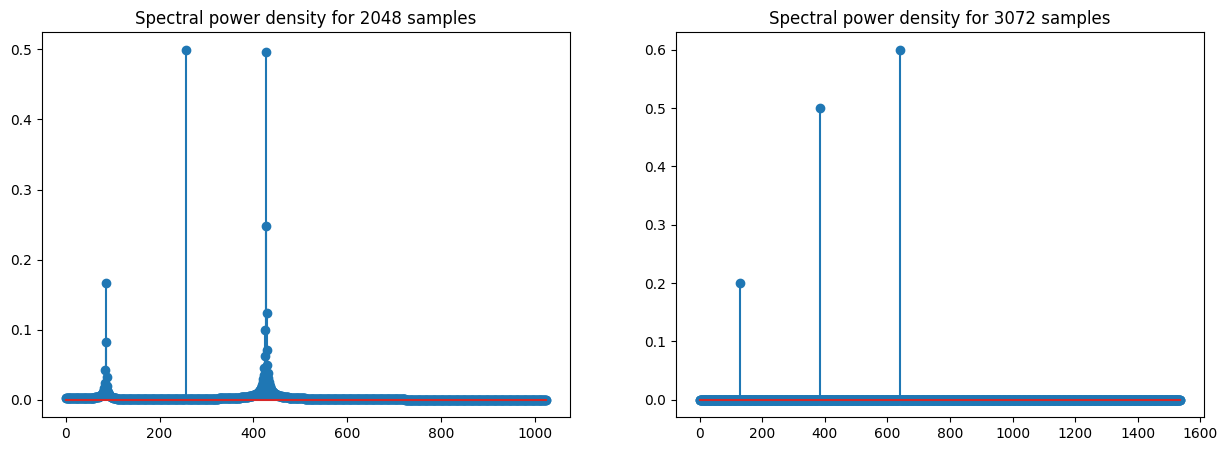

In [17]:
A1, A2, A3  = 0.2, 0.5, 0.6
f1, f2, f3 = 2000, 6000, 10000
fs = 48000

s = lambda t: A1 * np. sin(2 * np.pi * f1 * t) + A2 * np.sin(2 * np.pi * f2 * t) + A3 * np.sin(2 * np.pi * f3 * t)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
for N, ax in zip([2048, 3072], axs):
    signal = s(np.arange(N) / fs)
    psd = np.abs(fft(signal)) / N
    ax.title.set_text(f'Spectral power density for {N} samples')
    ax.stem(psd)

plt.show()

### Wnioski
Maksymalna częstotliowość to 10kHz -> 48kHz > 20kHz co pozwala odtworzyć sygnał analogowy z podaną częstoliwością z próbek - spełniony warunek Nyquiesta. 

Widać, ze dla podanej liczby próbek (N = 2048) mamy do czynienia ze zjawiskiem przecieku widma. Zjawisko to nie występuje dla N = 3072. Dzieje się tak, poniewaz
w przypadku składowych 2kHz oraz 10kHz otrzymujemy odpowiednio niecałkowite wielokrotności okresów sinusa w zadanej ilości próbek (2048 / (48khz / 2kHz) = 85,(3) oraz 2048 / (48kHz / 10kHz) = 426,(6)) powodując "rozlanie" wokół prązków sygnału. Sytuacja ta nie ma miejsca w przypadku N = 3072, ponieważ 3072 / (48khz / 2kHz) = 128, 3072 / (48kHz / 6kHz) = 384 oraz 3072 / (48kHz / 10kHz) = 640.